In [1]:
%matplotlib inline
import numpy as np
import pandas as pd 
import re
import matplotlib.pyplot as plt
from scipy import stats
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

pr_data = pd.read_csv("full_property_data.csv",encoding="utf-8")
pr_data.head(10)

,locality,property_type,bedrooms,size_sqm,price_euro,contact
0,"18,033 PROPERTIES for sale on Malta's best rat...",NaN,NaN,NaN,NaN,23880009.0
1,BALZAN,apartment,3.0,NaN,152000.0,21632918.0
2,"GOZO, GĦAJNSIELEM",terraced house,NaN,NaN,185000.0,99476959.0
3,"GOZO, NADUR: 3 double bedroom house of charact...",house of character,3.0,NaN,293000.0,79470419.0
4,"GOZO, VICTORIA: Spacious ground floor maisonet...",maisonette,NaN,NaN,145000.0,99492695.0
5,MARSASCALA,apartment,2.0,NaN,85000.0,21632919.0
6,QAWRA,apartment,3.0,NaN,140000.0,99056212.0
7,QAWRA,penthouse,3.0,NaN,75500.0,99220023.0
8,SIĠĠIEWI,maisonette,3.0,NaN,120000.0,99826148.0
9,ST PAUL' S BAY,apartment,3.0,NaN,250000.0,99220023.0


# Question (b): Clean the Data

In [2]:
#remove duplicates
pr_data = pr_data.drop_duplicates() 
pr_types = ['maisonette','penthouse','apartment','villa','terraced house','house of character','bungalow','farmhouse','palazzo','townhouse'] 
#all property types in data set

# Cleaning Locality Column

In [3]:
#keep only the words in capital letters, remove any spaces
def clean_loc(n):
    #stem of PROPERTIES is PROPERT
    if ("PRICE" in n) | ("BED" in n) | ("OR" in n) | ("EXCELLENT" in n) | ("PROPERT" in n) | ("REDUCTION" in n) | ("INVEST" in n) | ("AREA" in n) | ("SITE" in n) | ("FINISH" in n) | ("LOCAT" in n) | ("BUY" in n)| ("APARTMENT" in n) | ("MAISONETTE" in n) | ("SELL" in n): 
        return np.nan
    
    locality = ""
    if n.isupper():
        locality = n
    else:
        for word in n.split():
            if word.isupper():
                locality = locality + word 
    
    locality = locality.replace(' ','')
    locality = locality.replace('\'','')
    locality = locality.replace('-','')
    locality = locality.replace(',','')
    locality = locality.replace('\t','')
    locality = re.sub(r',$','',locality) #remove trailing ,

    if locality == "":
        return np.nan
    elif locality == "GOZO":
        return np.nan
    else:
        if re.search(r'\d', locality): #check if it contains a digit or unknown punctuation
            return np.nan
        if '/' in locality:
            locality = locality.split('/')[0] #keep first part only
        if ':' in locality:
            locality = locality.split(':')[0] #keep first part only
        if '(' in locality:
            locality = locality.split('(')[0] #keep first part only
        return locality

In [4]:
pr_data['locality'] = pr_data.locality.dropna().apply(clean_loc)
df = pd.DataFrame()
df = pr_data[~pr_data['locality'].isnull()]
df = df.reset_index(drop = True)
df.head(10)

,locality,property_type,bedrooms,size_sqm,price_euro,contact
0,BALZAN,apartment,3.0,NaN,152000.0,21632918.0
1,GOZOGĦAJNSIELEM,terraced house,NaN,NaN,185000.0,99476959.0
2,GOZONADUR,house of character,3.0,NaN,293000.0,79470419.0
3,MARSASCALA,apartment,2.0,NaN,85000.0,21632919.0
4,QAWRA,apartment,3.0,NaN,140000.0,99056212.0
5,QAWRA,penthouse,3.0,NaN,75500.0,99220023.0
6,SIĠĠIEWI,maisonette,3.0,NaN,120000.0,99826148.0
7,STPAULSBAY,apartment,3.0,NaN,250000.0,99220023.0
8,STVENERA,penthouse,1.0,NaN,94000.0,99220023.0
9,STVENERA,NaN,2.0,NaN,110000.0,99220023.0


In [5]:
for index, row in df['locality'].iteritems():
    if ("STPAUL" in row) | ("SANPAWL" in row):
        df.at[index, 'locality'] = "STPAULSBAY"
    elif ("AIRPORT" in row) :
        df.at[index, 'locality'] = "LUQA"
    elif ("XEMXIJA" in row) | ("PWALES" in row):
        df.at[index, 'locality'] = "XEMXIJA"
    elif ("MELLIEĦAHEIGHTS" in row) | ("SANTAMARIAESTATE" in row) | ("GĦADIRA" in row) | ("GHADIRA" in row):
        df.at[index, 'locality'] = "MELLIEĦA"
    elif ("TIGNÉ" in row)| ("POINT" in row) | ("FORTCAMBRIDGE" in row) | ("FORTCAMBRDIGE" in row) | ("THESTRAND" in row) | ("QUISISANA" in row):
        df.at[index, 'locality'] = "SLIEMA"
    elif ("BULEBEL" in row):
        df.at[index, 'locality'] = "ŻEJTUN"
    elif ("VICTORIAGARDENS" in row) | ("MADLIENA" in row):
        df.at[index, 'locality'] = "SWIEQI"
    elif ("SALINA" in row):
        df.at[index, 'locality'] = "NAXXAR"
    elif ("TASANNAT" in row):
        df.at[index, 'locality'] = "GOZOSANNAT"  
    elif ("BALZANVALLEY" in row):
        df.at[index, 'locality'] = "BALZAN"
    elif ("MSIDA" in row):
        df.at[index, 'locality'] = "MSIDA"
    elif ("THEVILLAGE" in row) | ("BALLUTABAY" in row) | ("PENDERGARDENS" in row) | ("STGEORGE" in row):
        df.at[index, 'locality'] = "STJULIANS" 
    elif ("BAHAR" in row) | ("BAĦAR" in row):
        df.at[index, 'locality'] = "BAĦARIĊĊAGĦAQ"
    elif ("VIRTÚ" in row) | ("VIRTU" in row):
        df.at[index, 'locality'] = "MARSA" 
    elif ("MONTEROSA" in row) | ("SANGWANN" in row) :
        df.at[index, 'locality'] = "SANĠWANN"  
    elif ("FLEURDELYS" in row) :
        df.at[index, 'locality'] = "BIRKIRKARA" 
    elif ("MONITA" in row) :
        df.at[index, 'locality'] = "MARSASCALA" 
    elif ("STANGELOMANSION" in row) :
        df.at[index, 'locality'] = "BIRGU" 
    elif ("QBAJJAR" in row) :
        df.at[index, 'locality'] = "GOZOMARSALFORN" 
    elif ("HAMRUN" in row) :
        df.at[index, 'locality'] = "ĦAMRUN" 
    elif ("ZURRIEQ" in row) :
        df.at[index, 'locality'] = "ŻURRIEQ" 
    elif ("MRIEHEL" in row) :
        df.at[index, 'locality'] = "MRIEĦEL" 
    elif ("SANLAWRENCE" in row) | ("SANLAWRENZ" in row):
        df.at[index, 'locality'] = "GOZOSANLAWRENZ" 

df.locality.unique()

array(['BALZAN', 'GOZOGĦAJNSIELEM', 'GOZONADUR', 'MARSASCALA', 'QAWRA',
       'SIĠĠIEWI', 'STPAULSBAY', 'STVENERA', 'TAXBIEX', 'TARXIEN',
       'STJULIANS', 'ŻEBBUĠ', 'ATTARD', 'BIRKIRKARA', 'COSPICUA',
       'GOZOFONTANA', 'GOZOSANNAT', 'GOZOXAGĦRA', 'KAPPARA', 'MĠARR',
       'MTARFA', 'NAXXAR', 'SANTALUĊIJA', 'SLIEMA', 'VALLETTA', 'ŻABBAR',
       'GOZOQALA', 'GOZOXEWKIJA', 'ANNEPULLICINO', 'ARESTAURANT',
       'BAĦARIĊĊAGĦAQ', 'BAĦRIJA', 'BIRGUMA', 'BIRŻEBBUĠA', 'BUĠIBBA',
       'DINGLI', 'FGURA', 'GĦARGĦUR', 'GĦAXAQ', 'GOZOGĦARB', 'GOZOMUNXAR',
       'GOZOSANLAWRENZ', 'GOZOXLENDI', 'GOZOŻEBBUĠ', 'GUARDAMANGIA',
       'GUDJA', 'GŻIRA', 'ĦAMRUN', 'IKLIN', 'KALKARA', 'KIRKOP', 'LIJA',
       'LUQA', 'SWIEQI', 'MANIKATA', 'MARSA', 'MARSAXLOKK', 'MELLIEĦA',
       'MOSTA', 'MQABBA', 'MSIDA', 'PAOLA', 'PIETÀ', 'XEMXIJA', 'QRENDI',
       'RABAT', 'SANĠWANN', 'SENGLEA', 'SWATAR', 'TALIBRAĠ', 'XGĦAJRA',
       'ŻEBBIEGĦ', 'ŻEJTUN', 'ŻURRIEQ', 'GOZOKERĊEM', 'PEMBROKE',
       'BENGĦ

In [6]:
#since analysis will be mostly based on locality, remove the records with empty locality
df = df.dropna(subset = ['locality'])
df['locality'] = df.locality.astype(str)
df = df.reset_index(drop = True)

# Cleaning Property Type Column

In [7]:
def get_pr_type(n):
    if n == "flat":
        pr_type = "apartment"
    elif n == "character house":
        pr_type = "house of character"
    elif n == "house":
        pr_type = "maisonette"
    elif n == "home":
        pr_type = "bungalow"
    else:
        pr_type = n
    return pr_type

In [8]:
df['property_type'] = df.property_type.apply(get_pr_type)
#df

In [9]:
#drop all listings whose property_type is empty
df = df.dropna(subset = ['property_type'])
#df.loc['property_type'] = df.property_type.astype(str)
df = df.reset_index(drop = True)
df.head(10)

,locality,property_type,bedrooms,size_sqm,price_euro,contact
0,BALZAN,apartment,3.0,NaN,152000.0,21632918.0
1,GOZOGĦAJNSIELEM,terraced house,NaN,NaN,185000.0,99476959.0
2,GOZONADUR,house of character,3.0,NaN,293000.0,79470419.0
3,MARSASCALA,apartment,2.0,NaN,85000.0,21632919.0
4,QAWRA,apartment,3.0,NaN,140000.0,99056212.0
5,QAWRA,penthouse,3.0,NaN,75500.0,99220023.0
6,SIĠĠIEWI,maisonette,3.0,NaN,120000.0,99826148.0
7,STPAULSBAY,apartment,3.0,NaN,250000.0,99220023.0
8,STVENERA,penthouse,1.0,NaN,94000.0,99220023.0
9,TAXBIEX,villa,3.0,NaN,850000.0,99252868.0


# Handle Outliers

# Outliers in Price Column

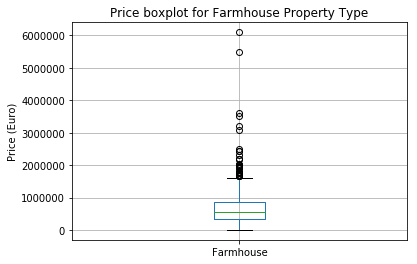

In [10]:
#outliers in farmhouse prices
farmhouse_price_df = pd.DataFrame()
farmhouse_price_df['Farmhouse'] = df[df['property_type'] == 'farmhouse'].price_euro.dropna()
farmhouse_price_df

plt.figure()
plt.title('Price boxplot for Farmhouse Property Type')
plt.ylabel('Price (Euro)')

p = farmhouse_price_df.boxplot(return_type='dict')
axes = plt.gca()
#from box plots, one can note that there are many outliers in the price of farmhouse
#we now remove these outliers
#if we use 3 times standard deviation, there are many values that we keep that are outliers

In [11]:
#function to remove the price outliers according to the type of property which is passed as parameter
def remove_price_outlier(property_type, df_no_outlier):
    price_df = pd.DataFrame()
    price_df = df_no_outlier[df_no_outlier['property_type'] == property_type].price_euro.dropna().astype('float')
    #to_drop = price_df[(np.abs(price_df - price_df.mean()) > (price_df.std()))]
    index_to_drop = price_df[(np.abs(price_df - price_df.mean()) > (0.5 * price_df.std()))].index.values
    df_no_outlier = df_no_outlier.drop(index_to_drop)
    return df_no_outlier
    

In [12]:
#remove price outliers for all property types 
df_no_price_outlier = df
for pr in pr_types:
        df_no_price_outlier = remove_price_outlier(pr, df_no_price_outlier)
#df_no_price_outlier

# Outliers in Size Column

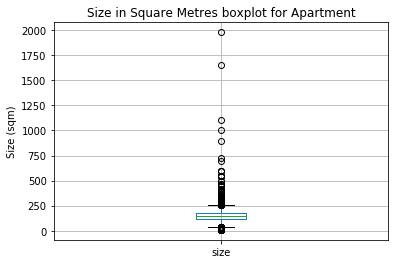

In [13]:
#outliers in size of property having type apartment
apartment_size_df = pd.DataFrame()
apartment_size_df['size'] = df_no_price_outlier[df_no_price_outlier['property_type'] == 'apartment'].size_sqm.dropna()
apartment_size_df

plt.figure()
plt.title('Size in Square Metres boxplot for Apartment')
plt.ylabel('Size (sqm)')
p = apartment_size_df.boxplot(return_type='dict')
axes = plt.gca()

In [14]:
#function to remove size outliers according to the type of property which is passed as parameter
def remove_size_outlier(property_type, df_no_outlier):
    size_df = pd.DataFrame()
    size_df = df_no_outlier[df_no_outlier['property_type'] == property_type].size_sqm.dropna().astype('float')
    #2 * standard deviation since we do not want to remove many
    #to_drop = size_df[(np.abs(size_df - size_df.mean()) > (2*size_df.std()))]
    #index_to_drop = size_df[(np.abs(size_df - size_df.mean()) > (2*size_df.std()))].index.values
    index_to_drop = size_df[(np.abs(size_df - size_df.mean()) > (0.5 * size_df.std()))].index.values
    
    df_no_outlier = df_no_outlier.drop(index_to_drop)
    return df_no_outlier   

In [15]:
#remove price outliers for all property types 
df_no_size_outlier = df_no_price_outlier
for pr in pr_types:
        df_no_size_outlier = remove_size_outlier(pr, df_no_size_outlier)
#df_no_size_outlier

In [16]:
df_no_outlier = df_no_size_outlier
df_no_outlier = df_no_outlier.reset_index(drop=True)

# Impute missing data

In [17]:
#convert prices to dictionary
dict_pd = pd.DataFrame()
dict_pd['property_type'] = df_no_outlier.property_type
dict_pd['price'] = df_no_outlier.price_euro.dropna()
dict_pd['size'] = df_no_outlier.size_sqm.dropna()
dict_pd['bedrooms'] = df_no_outlier.bedrooms.dropna()
#dict_pd

#mean = dict_pd.groupby('property_type').mean()
price_mean = np.around(dict_pd.groupby('property_type').mean(), decimals=1).to_dict()['price']
size_mean = np.around(dict_pd.groupby('property_type').mean(), decimals = 1).to_dict()['size']
bedrooms_mean = np.around(dict_pd.groupby('property_type').mean(), decimals = 0).to_dict()['bedrooms']

In [18]:
df_clean = pd.DataFrame()
df_clean['locality'] = df_no_outlier['locality'] 
df_clean['property_type'] = df_no_outlier['property_type'] 
#df_clean['bedrooms'] = df_no_outlier['bedrooms'] 

#replace nan of bedrooms by resp average
df_clean['bedrooms'] = list(map(lambda bedrooms, property_type:
    bedrooms_mean[property_type] if np.isnan(bedrooms) else bedrooms, df_no_outlier['bedrooms'],df_no_outlier['property_type']))

#replace nan of price by resp average
df_clean['price_euro'] = list(map(lambda price, property_type:
    int(price_mean[property_type]) if np.isnan(price) else price, df_no_outlier['price_euro'],df_no_outlier['property_type']))
df_clean

#replace nan of size by resp average
df_clean['size_sqm'] = list(map(lambda size, property_type:
    size_mean[property_type] if np.isnan(size) else size, df_no_outlier['size_sqm'],df_no_outlier['property_type']))

df_clean['contact'] = df_no_outlier['contact']
df_clean.head(10)

,locality,property_type,bedrooms,price_euro,size_sqm,contact
0,BALZAN,apartment,3.0,152000.0,148.3,21632918.0
1,GOZONADUR,house of character,3.0,293000.0,241.9,79470419.0
2,MARSASCALA,apartment,2.0,85000.0,148.3,21632919.0
3,QAWRA,apartment,3.0,140000.0,148.3,99056212.0
4,SIĠĠIEWI,maisonette,3.0,120000.0,177.6,99826148.0
5,STPAULSBAY,apartment,3.0,250000.0,148.3,99220023.0
6,TAXBIEX,villa,3.0,850000.0,447.3,99252868.0
7,ŻEBBUĠ,farmhouse,3.0,950000.0,637.9,99475444.0
8,BALZAN,apartment,2.0,147000.0,148.3,21632918.0
9,BALZAN,apartment,3.0,150000.0,148.3,99509048.0


In [19]:
#make sure that none of the columns of the price is empty
df_clean = df_clean[~df_clean['price_euro'].isnull()]
df_clean['price_euro'] = df_clean['price_euro'].astype(int)
#df_clean.head(2)
#may improve by imputing price according to both location and property type 

In [20]:
#save the cleaned data to csv
df_clean.to_csv("cleaned_property_data.csv", index = False)

# Question (c): Make Statements about Different Aspects of Data

# Statement 1: Price according to Property Type 

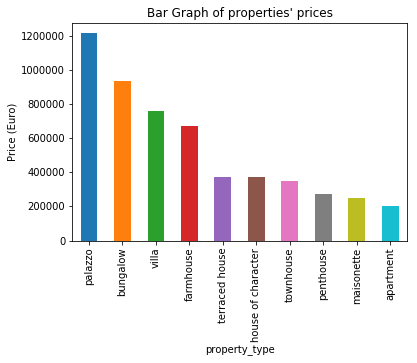

In [46]:
#analyse the price according to the property type
df_stat1 = df_clean.groupby('property_type')['price_euro'].mean().astype(int)

plt.figure()
plt.title("Bar Graph of properties' prices")
plt.ylabel("Price (Euro)")
df_stat1.sort_values(ascending=False).plot(kind='bar')

# Statement 2 - Localities having most properties for sale

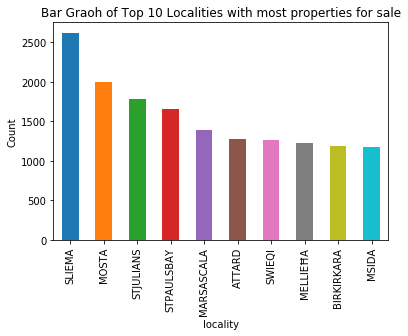

In [47]:
#analyse how many properties for sale there are in each locality
df_stat2 = df_clean.groupby(['locality'])['locality'].count()
df_stat2 = df_stat2.sort_values(ascending=False)
plt.figure()
plt.title("Bar Graoh of Top 10 Localities with most properties for sale")
plt.ylabel("Count")
df_stat2.head(10).plot(kind='bar')

# Statement 3 - Most Cheap Localities to buy an Apartment

In [23]:
#analyse how many properties for sale there are in each locality
df_stat3 = df_clean[df_clean['property_type'] == 'apartment'].groupby('locality')['price_euro'].mean()
df_stat3 = df_stat3.sort_values(ascending=True)

df_stat3.head(10).astype(int)
#plt.figure()
#plt.title("Histogram of Top 10 most cheapest localities to buy an apartment in")
#plt.ylabel("Price (Euro)")
#df_stat3.head(10).plot(kind='bar')

locality
GOZOMUNXAR         98576
GOZOSANNAT        107521
GOZOMARSALFORN    115000
PAOLA             115133
GUDJA             116051
GOZOFONTANA       126243
ŻEJTUN            126810
FGURA             126918
TARXIEN           131358
GOZOXEWKIJA       131381
Name: price_euro, dtype: int64

# Statement 4 - Most Common number of Bedrooms

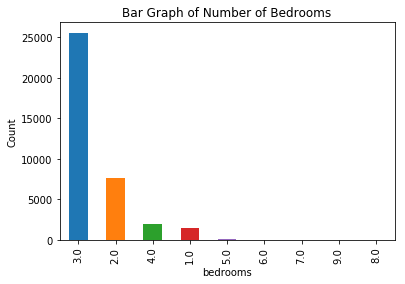

In [48]:
#analyse the count of the number of bedrooms
df_stat4 = df_clean.groupby('bedrooms')['bedrooms'].count()
df_stat4 = df_stat4.sort_values(ascending=False)
plt.figure()
plt.title("Bar Graph of Number of Bedrooms")
plt.ylabel("Count")
df_stat4.head(10).plot(kind='bar')

# Statement 5 - Most Common type of Property for Sale

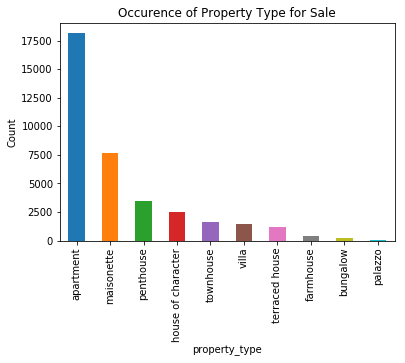

In [25]:
#analyse which are the most common types of properties for sale
df_stat5 = df_clean.groupby(['property_type'])['property_type'].count()
df_stat5 = df_stat5.sort_values(ascending=False)
plt.figure()
plt.title("Occurence of Property Type for Sale")
plt.ylabel("Count")
df_stat5.plot(kind='bar')

# Question (d): Correlation between two Variables in the dataset

In [26]:
#correlation between property size and property price
correlation = stats.pearsonr(df_clean['bedrooms'].dropna(), df_clean['price_euro'].dropna())[0]
print("Pearson Correlation between property size and property price is ", "{:.4f}".format(correlation))

Pearson Correlation between property size and property price is  0.3135


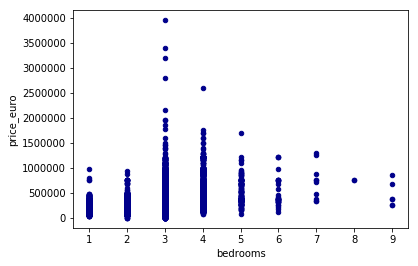

In [27]:
df_clean.plot.scatter(x='bedrooms',y='price_euro',c='DarkBlue')

# Question (e): Statistical Analyses

In [28]:
#H0 = Prices of properties depend on size (in sqm) of that respective property.
#H1 = Prices of properties is independent of the size of that property.

In [29]:
bedrooms = df_clean['bedrooms']
price = df_clean['price_euro']
stats.ttest_ind(bedrooms, price)

Ttest_indResult(statistic=-303.69968636205783, pvalue=0.0)

In [30]:
print("Since the resulting p-value is smaller than alpha threshold, null hypothesis is rejected. Thus, property prices do not depend on the number of bedrooms.")   

Since the resulting p-value is smaller than alpha threshold, null hypothesis is rejected. Thus, property prices do not depend on the number of bedrooms.


# Question (f): Predictive Model

In [31]:
X = df_clean[["size_sqm"]].values
Y = df_clean[['price_euro']].values

In [32]:
linear_regression = LinearRegression()

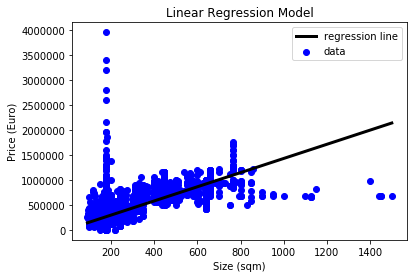

In [34]:
linear_regression.fit(X, Y)
prediction_space = np.linspace(min(X),max(X)).reshape(-1, 1)
plt.scatter(X, Y, color='blue', label='data')
plt.plot(prediction_space, linear_regression.predict(prediction_space),color='black', label='regression line', linewidth=3)
plt.ylabel("Price (Euro)")
plt.xlabel("Size (sqm)")
plt.legend()
plt.title("Linear Regression Model")
plt.show()

In [35]:
 #R^2 which tells us how good our line fit is 
print("The score of the linear regression model is ", linear_regression.score(X,y))

The score of the linear regression model is  0.5450523139515525


In [36]:
print("The coefficients are ", linear_regression.coef_) #only one coef since regression line is a straight line

The coefficients are  [[1415.87695734]]


In [37]:
print("The y-intercept is ", linear_regression.intercept_)

The y-intercept is  [12569.39309078]


In [ ]:
#usually split our data into two subsets: training data and testing data  
#then we fit our model on the train data, in order to make predictions on the test data
#one of two thing might happen: we overfit our model or we underfit our model. 
#overfit - model we trained has trained “too well” and is now fits too closely to the training dataset, happens when model is too complex, model will be very accurate on the training data but will probably be very not accurate on untrained or new data
#underfit - model does not fit the training data, misses the trends in the data, model cannot be generalized to new data

In [38]:
#training and testing
x_training, x_testing, y_training, y_testing = train_test_split(X, Y, test_size=0.2) #test_size indicates percentage of data that should be kept for testing
print (x_training.shape, y_training.shape)
print (x_testing.shape, y_testing.shape)

(29459, 1) (29459, 1)
(7365, 1) (7365, 1)


In [39]:
#fit the model on the training data
# fit a model
lm = LinearRegression()
model = lm.fit(x_training, y_training)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [40]:
prediction = lm.predict(x_testing)
prediction

array([[222272.74862805],
       [217590.06143044],
       [222272.74862805],
       ...,
       [222272.74862805],
       [355090.78550574],
       [182115.15841823]])

(array([-500000.,       0.,  500000., 1000000., 1500000., 2000000.,
        2500000., 3000000.]), <a list of 8 Text xticklabel objects>)

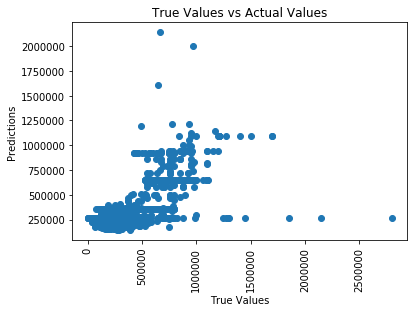

In [41]:
#plot the model
plt.scatter(y_testing, prediction)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title("True Values vs Actual Values")
plt.xticks(rotation=90)

In [42]:
print("The accuracy score of the linear regression model is ", model.score(x_testing, y_testing))

The accuracy score of the linear regression model is  0.5345212299630466
